# Project Title  
   #### Analysis of environmental inequality in California
    - the social factors associated with worse air pollution in Southern California
**Team members:**  
    - Yu-Chun Chen A13356506  
    - Yanyu Tao A13961185


# Questions Proposed  
  
   We are interested in the research about how air pollution, which refers to Greenhouse Gases such as SO2, O3 NO2 and CO, in California is associated with local geography and the social factors. We have decided to modify our study area from the whole United States, as in Project Proposal, to California specifically. This is because we decided to make each county a unit of study, instead of a state as a unit, so that the data can represent each unit more precisely.  
     
   Specifically, we would like to explore how each county’s business or factory types, average income, incidence rate of respiratory diseases, are related to the seriousness of air pollution in its range. We expect that areas with more serious air pollution are those with more factories associated to fossil fuels, mining, and manufacturing will produce more air pollutants, lower average income, higher population, higher incidence rate of respiratory or lung diseases. The issue is at stake as air pollution can damage not only human health, but also animals’ and plants’. As most air pollutants are created by human activities, such as burning fossil fuels and emissions of factories, we would like to stress the danger of air pollution to our community so that we can promote a healthier place to live.  
     
   We can apply our analysis result to reduce the risk of air pollution, thus to promote health. If we learn that a specific type of factories has a strong association with air pollution, this suggests that it is possibly a good idea to limit the number of this type of factories in each county. We can also distribute resources for hospitalization and emergency departments to each area using our analysis. We will focus our expected audience on local government and state governments, because they have the authority to regulate businesses regarding their emissions. With our analysis, governments will understand what types of areas produce the most air pollution, and are able to deal with pollution in those areas accordingly.

# Background and literatures  
  
Heavy industry emits pollutants that are toxic and hazardous and affect human health. In the article “The effect of industry-related air pollution on lung function and respiratory symptoms in school children,” authors specify that PM2.5 and NOX are the air pollutants from industries most associated with respiratory diseases.  
  
Also, According to the research “Relation between income, air pollution and mortality: a cohort study” done by Finkelstein, Jerrett, DeLuca, Finkelstein, Verma, Chapman and Sears with their investigation on data for cities in Canada and the United States, the authors conclude that pollutant level is higher in areas that have lower income. Moreover, areas with higher pollutant level, such as sulfur dioxide, have higher mortality risk. As the idea that outdoor pollution mainly caused by traffic and power generation will exacerbate pre-existing asthma has been proved decades ago, in the research “Outdoor air pollution and asthma,” authors Michael Guarnieri and   John R. Balmes develop further on the idea and claim that outdoor pollution will also cause to new-onset asthma. Specifically, short-term exposure to ozone, nitrogen dioxide, sulphur dioxide, PM2·5, and TRAP will exacerbate pre-existing asthma while long-term exposure to those air pollutants will eventually contribute to new-onset asthma for both children and adults. As the strong association between air pollution and increasing morbidity and mortality being confirmed by more and more authoritative institutions and organizations, authors of the article “Fine-Particulate Air Pollution and Life Expectancy in the United Sates published by The New England Journal of Medicine”, claim that sustaining reductions of pollution exposure will lead to a better life expectancy. The data on life expectancy, socioeconomic status, and demographic characteristics for U.S. counties during late 1970s to early 1980s, and late 1990s to early 2000s were developed. Multiple regression models were built to demonstrate the association between pollution reductions and shifts in life expectancy. The result suggests that the increase of overall life expectancy is highly sensitive to the reductions of air pollution alone and not as sensitive to other features.   
  
We expect to confirm above research results since we hypothesize that serious air pollution will have a series of effects on commuter health, income, and other social factors, which eventually leads to lower life expectancy.   
  
__*References:*__  
  
*Bergstra, A. D., Brunekreef, B., & Burdorf, A. (2018). The effect of industry-related air pollution on lung function and respiratory symptoms in school children. Environmental Health, 17(1). doi:10.1186/s12940-018-0373-2
https://ehjournal.biomedcentral.com/articles/10.1186/s12940-018-0373-2*  
  
*Finkelstein, M. M., Jerrett, M., DeLuca, P., Finkelstein, N., Verma, D. K., Chapman, K., & Sears, M. R. (2003, September 02). Relation between income, air pollution and mortality: A cohort study. Retrieved May 12, 2019, from https://www.ncbi.nlm.nih.gov/pmc/articles/PMC183288/*  
  
*Guarnieri, M., & Balmes, J. R. (2014). Outdoor air pollution and asthma. Lancet (London, England), 383(9928), 1581–1592. doi:10.1016/S0140-6736(14)60617-6*  
  
*Pope, C. A., Ezzati, M., & Dockery, D. W. (2009). Fine-Particulate Air Pollution and Life Expectancy in the United States. New England Journal of Medicine, 360(4), 376-386. doi:10.1056/nejmsa0805646. Retrieved May 12, 2019, from https://www.nejm.org/doi/full/10.1056/NEJMsa0805646*  


# Python Libraries and Arcgis Modules

We have used pandas libraries for data cleaning and preprocessing, and geopandas in order to fill the crs of data table so we can store the data as Spatially Enabled DataFrame in .shp form, and upload the shp file to ArcGis to create layer.

In [1]:
%matplotlib inline 
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

We have imported the following ArcGIS modules and functions in order to perform spatial operations, including mapping, creating layers, buffering, and other spatial analysis, etc.

In [2]:
import arcgis
from arcgis.gis import GIS
from arcgis import geometry
from arcgis.features import GeoAccessor, GeoSeriesAccessor
from arcgis.geocoding import geocode
from arcgis.geometry import lengths
from arcgis.features.use_proximity import create_buffers
from arcgis.features.find_locations import find_existing_locations
from arcgis.features import summarize_data
from arcgis.mapping import WebMap

We also imported sklearn module in order to explore the association among average income, GHG, TRI emissions, common industry, asthma incidence rate, and copd incidence rate and AQI. Here, we will use random forest classifier.

In [3]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression

We suppress warnings regarding future Pandas functions change to make the notebook cleaner.

In [4]:
import warnings
warnings.filterwarnings('ignore')

Login to ArcGIS account to have access to above modules and necessary layers.

In [5]:
gis = GIS(username="yuc330_UCSDOnline9")  # this will ask for password. You can also include your password in this string

Enter password: ········


# Data Sources  
  
### DataFrame Data  
**US Household Income Statistics:**   
	The dataset includes information of mean/median household income, number of households, geographic location information such as state, county and city for each city recorded.  
Accessed from https://www.kaggle.com/goldenoakresearch/us-household-income-stats-geo-locations.  
  
**US Facility-Level Air Pollution (2010-2014):**  
	The dataset includes information of facilities, their geographic information, industry type, NAICS code, and emissions.  
Accessed from https://www.kaggle.com/jaseibert/us-facilitylevel-air-pollution-20102014.  
  
**U.S. Pollution Data:**  
	The dataset includes information of air pollution in each city in the United States, specifically CO and SO2 emission level.  
Accessed from https://www.kaggle.com/sogun3/uspollution  
  
**NAICS and SOC Dictionaries:**  
	This dataset contains historical mapping of NAICS industry codes and SOC occupational codes, which we will use to identify the most common industry type in each county. The North American Industry Classification System (NAICS) is the standard used by Federal statistical agencies in classifying business establishments for the purpose of collecting, analyzing, and publishing statistical data related to the U.S. business economy.  
Accessed from https://www.kaggle.com/rakeshchintha/naics-soc/version/3  
  
**Current Asthma:**  
	This dataset includes information of current asthma cases in 500 cities in California.  
Accessed from https://healthyplacesindex.org/data-reports/  
  
**Chronic Obstructive Pulmonary Disease:**  
	This dataset includes information of current COPD cases in 500 cities in California.  
Accessed from https://healthyplacesindex.org/data-reports/ 
  
### Layer Data (from ArcGIS)  
**USA Counties (Generalized):**  
ID: 7566e0221e5646f99ea249a197116605  
Feature Layer by Esri    
USA Counties (Generalized) provides the county boundaries of the United States in the 50 states and the District of Columbia.      
  


**Reflection**  
  
Our data sources have evolved from the phase of proposal to add the NAICS dictionary for us to decode the NAICS code, reported cases of Asthma and COPD to calculate incidence rate of them, and USA County layer to create a polygon layer for California counties.  
  
If possible, we would like to get data of the air quality for each county, as this will make our analysis more practical. Nevertheless, as now we would use the US Pollution Data and the buffer operation to perform our analysis. Also, our analysis can be more precise with data of individual long term and short term exposure air pollutant. However, this is fairly unpractical and is only possible if surveys are conducted.

In [6]:
#US household income statistics
income_df = pd.read_csv('kaggle_income.csv', encoding='latin-1')

In [7]:
#USA Counties (Generalized)
usa_county = gis.content.get('7566e0221e5646f99ea249a197116605')

In [15]:
#US pollution data (monitoring sites)
pol_df = pd.read_csv('pollution_us_2000_2016.csv', encoding='latin-1')

In [24]:
#US facility level air pollution
us_facility_ap = pd.read_csv('pollution.csv')

In [25]:
#NAICS Dictionaries
naics_code = pd.read_csv('naics_codes.csv', encoding = 'latin-1')

In [30]:
#Current Asthma and Chronic Obstructive Pulmonary Disease
casthma = pd.read_csv('HPI2_500Cities_CASTHMA.csv', encoding='latin-1')
copd = pd.read_csv('HPI2_500Cities_COPD.csv', encoding='latin-1')

# Data Cleaning  
For each data used, we have to extract only information we need in order to avoid unnecessary operations and memories used. For all data that has extent of the whole US, we only extract information of California. We also only extract information that is the most recent. We used metadata to get a general sense on how we would perform our data cleaning. However, we also need to introspect the data itself to decide what exact processes are needed.  
  
We already expected to perform operations needed to extract most recent Californian information, replace missing or nan values, and also renaming columns. However, operations that required us to save and upload dataframe to ArcGIS because of the lack of matching epsg number is out of our expectation.

### Income and County Layer

In [11]:
#extract information of California only
income_df = income_df[income_df['State_ab'] == 'CA']

In [12]:
#compute average income for each county
county_income = income_df.groupby('County')['Mean'].mean().to_frame()

In [8]:
#we extract only county information for California from usa county layer
ca_county = usa_county.layers[0].query("STATE_NAME = 'California'", return_geometry=True).sdf

In [9]:
ca_county['NAME'] = ca_county['NAME'].apply(lambda x: x + ' County')

In [13]:
#add income information to the ca county df
ca_county['income'] = ca_county['NAME'].apply(lambda x: county_income.loc[x].values[0] if x in county_income.index else 0)

In [14]:
#replace nan values
ca_county = ca_county.replace(np.nan, '', regex = True)

In [12]:
#cells below are process used to store and get our ca county layer through uploading to ArcGIS
ca_county.spatial.to_featureclass('./ca_county')

'./ca_county.shp'

In [13]:
#save ca counties dataset as a shapefile to upload to ArcGIS layer
gdf = gpd.read_file('ca_county.shp')

In [14]:
gdf = gpd.GeoDataFrame(gdf, crs = {'init': 'espg:3857'}, geometry = 'geometry')

In [15]:
gdf.to_file('ca_county_1.shp')

In [34]:
#get the ca county layer (with income info) we have uploaded to ArcGIS
ca_county_layer = gis.content.get("b1c408a86c834037adf3f2660f6a1920")

### Air Quality Data of Monitoring Sites

In [17]:
#extract only information of California and in year 2016
pol_df = pol_df[(pol_df['State'] == 'California') & (pol_df['Date Local'].str.contains('2016'))]

In [18]:
#calculate average AQI of each GHG for 2016 for each monitoring site
pol_city = pol_df.groupby(['City'])['O3 AQI', 'NO2 AQI', 'SO2 AQI', 'CO AQI'].mean().reset_index()

In [19]:
#add income information into this dataframe
pol_pos = pol_city.merge(income_df, how = 'left', left_on= 'City', right_on = 'City').drop_duplicates(['City'])

In [20]:
#fill the missing lat long information for some monitoring sites
pol_pos.loc[pol_pos.City == 'Arden-Arcade', 'Lat'] = 38.6008
pol_pos.loc[pol_pos.City == 'Arden-Arcade', 'Lon'] = -121.3770
pol_pos.loc[pol_pos.City == 'Bethel Island', 'Lat'] = 38.0149
pol_pos.loc[pol_pos.City == 'Bethel Island', 'Lon'] = -121.6405
pol_pos.loc[pol_pos.City == 'Capitan', 'Lat'] = 34.4633
pol_pos.loc[pol_pos.City == 'Capitan', 'Lon'] = -120.0432
pol_pos.loc[pol_pos.City == 'Vandenberg Air Force Base', 'Lat'] = 34.7420
pol_pos.loc[pol_pos.City == 'Vandenberg Air Force Base', 'Lon'] = -120.5724

### Facilities and facility level emissions

In [26]:
#extract only information of california and create SEDF from this dataframe
ca_facility_ap = us_facility_ap[us_facility_ap['State'] == "CA"]
ca_fac_sdf = pd.DataFrame.spatial.from_xy(ca_facility_ap,x_column = 'Longitude', y_column='Latitude')

In [27]:
#drop unnecessary columns and rename columns that have names longer than 10 char
ca_fac_sdf = ca_fac_sdf.drop(['SecondPrimaryNAICS', 'ThirdPrimaryNAICS', 
                              'TRI_Air_Emissions_13_in_lbs', 'TRI_Air_Emissions_12_in_lbs',
       'TRI_Air_Emissions_11_in_lbs', 'TRI_Air_Emissions_10_in_lbs', 'GHG_Direct_Emissions_13_in_metric_tons',
       'GHG_Direct_Emissions_12_in_metric_tons',
       'GHG_Direct_Emissions_11_in_metric_tons',
       'GHG_Direct_Emissions_10_in_metric_tons',
        'Second_GHG_ID', 'Third_GHG_ID', 'Fourth_GHG_ID', 'Fifth_GHG_ID',
       'Sixth_GHG_ID', 'Second_TRI_ID', 'Third_TRI_ID',
       'Fourth_TRI_ID', 'Fifth_TRI_ID', 'Second_FRS_ID',
       'Third_FRS_ID', 'Fourth_FRS_ID'], axis = 1)
ca_fac_sdf = ca_fac_sdf.rename(columns={"TRI_Air_Emissions_14_in_lbs": "TRI_Emi", "GHG_Direct_Emissions_14_in_metric_tons": "GHG_Emi"})

In [28]:
#replace and fill missing data
ca_fac_sdf = ca_fac_sdf.replace(np.nan, '', regex=True)
ca_fac_sdf['TRI_Emi'] = ca_fac_sdf.TRI_Emi.replace('Not reported', '0')
ca_fac_sdf['GHG_Emi'] = ca_fac_sdf.GHG_Emi.replace('Not reported', '0')
ca_fac_sdf['TRI_Emi'] = ca_fac_sdf.TRI_Emi.astype('float')
ca_fac_sdf['GHG_Emi'] = ca_fac_sdf.GHG_Emi.astype('float')

###  Asthma & COPD

In [53]:
#calculate average incidence rate in each county
asthma_rate = casthma.dropna(subset = ['CASTHMA_pct']).groupby('County_Name')['CASTHMA_pct'].mean()
copd_rate = copd.dropna(subset = ['COPD_pct']).groupby('County_Name')['COPD_pct'].mean()
asthma_rate.index = asthma_rate.index.str.upper()
copd_rate.index = copd_rate.index.str.upper()

# Descriptive Statistics

We are not dealing with random point patterns here, as nearly all of our data exhibit some spatial correlation. For example, the counties along the coastal line have higher average income generally. However, the question regarding spatial mean and standard distance is not relevant to our research theme and data, as we use counties as unit, and the area of counties is not a relevent measure in our analysis.

### Average Income  
From the map generated below, we can see that counties with more income are concentrated along the coastal line. The mean income of each county is \\$47610 while the standard deviation is \\$36401, which is a relatively large variation.

In [32]:
#summary of income data
ca_county['income'].describe().T

count        58.000000
mean      47610.483230
std       36401.181601
min           0.000000
25%           0.000000
50%       52251.137500
75%       77869.848545
max      123775.000000
Name: income, dtype: float64

In [35]:
#show California Map according to each county's income
map_county = gis.map('California')
location = geocode('California')[0]
map_county.extent = location['extent']
#ca_county.spatial.plot(map_widget = map_county, renderer_type = 'c', col = 'income', class_count = 10, cmap='autumn_r')
map_county.add_layer(ca_county_layer, {'renderer':'ClassedColorRenderer', 'field_name':'income', 'opacity':0.5, 'cmap':'YlGrBl', 'class_count':10})
map_county

MapView(layout=Layout(height='400px', width='100%'))

### Air Quality

In [36]:
#summary of air quality index data
pol_pos[['O3 AQI', 'NO2 AQI', 'SO2 AQI', 'CO AQI']].describe().T

,count,mean,std,min,25%,50%,75%,max
O3 AQI,14.0,32.705623,5.660707,24.464286,28.432602,31.381971,37.051149,43.021978
NO2 AQI,14.0,17.034484,9.746581,1.522222,10.252066,18.337385,24.454228,33.659341
SO2 AQI,14.0,1.323060,1.040100,0.000000,0.596154,0.929752,2.093097,3.750000
CO AQI,14.0,5.850242,2.665205,1.533333,4.378326,6.161674,7.352199,10.802198


In [37]:
#define function to plot histogram
def draw_histograms(df, variables, n_rows, n_cols):
    fig=plt.figure()
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        df[var_name].hist(bins=10,ax=ax)
        ax.set_title(var_name+" Distribution")
    fig.tight_layout()  # Improves appearance a bit.
    plt.show()

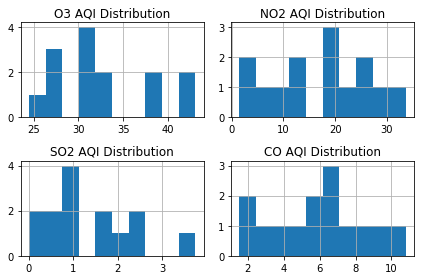

In [38]:
draw_histograms(pol_pos, ['O3 AQI', 'NO2 AQI', 'SO2 AQI', 'CO AQI'], 2, 2)

### Facilities and Facility Emissions

In [39]:
#summary of data
ca_fac_sdf[['TRI_Emi', 'GHG_Emi']].describe().T

,count,mean,std,min,25%,50%,75%,max
TRI_Emi,1642.0,5136.468609,35461.504522,0.0,0.0,0.0,204.75,744843.0
GHG_Emi,1642.0,70525.630329,326987.513375,0.0,0.0,0.0,12367.25,6294749.0


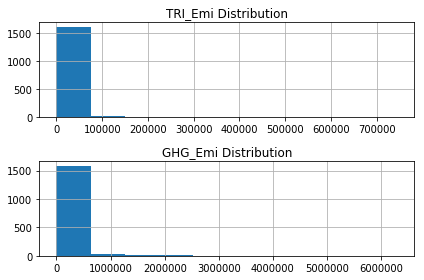

In [40]:
#histograms of TRI and GHG emission of facilities
draw_histograms(ca_fac_sdf, ['TRI_Emi', 'GHG_Emi'], 2, 1)

In [41]:
#counts of each facility type
ca_fac_sdf['PrimaryNAICS'].value_counts().head(10)

Fossil Fuel Electric Power Generation                           131
Ready-Mix Concrete Manufacturing                                119
Solid Waste Landfill                                            111
Electroplating, Plating, Polishing, Anodizing, and Coloring      50
Petroleum Bulk Stations and Terminals                            41
Other Chemical and Allied Products Merchant Wholesalers          37
Bare Printed Circuit Board Manufacturing                         37
National Security                                                34
Crude Petroleum and Natural Gas Extraction                       34
All Other Plastics Product Manufacturing                         28
Name: PrimaryNAICS, dtype: int64

### Asthma & COPD

In [49]:
#summary of incidence rate of Asthma
casthma['CASTHMA_pct'].describe()

count    5124.000000
mean        8.548888
std         1.220257
min         5.300000
25%         7.600000
50%         8.400000
75%         9.300000
max        14.100000
Name: CASTHMA_pct, dtype: float64

In [50]:
#summary of incidence rate of COPD
copd['COPD_pct'].describe()

count    5124.000000
mean        5.360226
std         1.625888
min         1.100000
25%         4.300000
50%         5.100000
75%         6.200000
max        22.300000
Name: COPD_pct, dtype: float64

# Analysis

After we are done with the preprocessing steps of data cleaning and exploration, we would like to first investigate the US pollution dataset to visualize how every monitoring site and air quality index data distributed across the counties of California. In the dataset, we have a total of four air quality indexes for air pollutants including Ozone, Nitrogen Dioxide, Sulfur Dioxide, and Carbon monoxide, denoted as O3 AQI, NO2 AQI, SO2 AQI and CO AQI respectively.   
  
1.	We first normalize the air quality index of each air pollutant and save to new columns; then we calculate the overall AQI by taking the average of the moralized AQI values of the four gases and save it to a new column. 
2.	Drop data without lat/lon information from the dataset.
3.	Turn the dataframe into a spatially enabled dataframe with lat/lon as spatial column. 
4.	Create a point layer by turning the above SEDF into a featurelayer in ArcGIS.   
From the map, we notice that not all counties in CA have a monitoring site, so we decide to buffer from the point layer we already have by 80 miles to cover the majority of the counties. By this point, most counties have AQI values of various air pollutants.  
5.	Map the buffered layer on top of CA basemap; classed-render the level of AQI of each air pollutant and the averaged AQI with the chosen colormap.  
  
From the several maps, we can see that the darker the color of the buffer, the higher the AQI is, thus the worse the air quality will be.   
Next, we want to visualize the overall air quality of California by county, so we spatial join the CA county layer with the buffered AQI layer (This step is performed using ArcGIS online and the result is saved to layer directly). From the saved layer, we can see a clear trend that the air quality become worse and worse when getting towards the Southeastern of CA. With this observation, we want to make further investigation on different social factors to find out their associations with the air pollution trend in CA.   
  
**Income:**  
As the average income information of each county is joined with the CA county layer in the data cleaning process, we directly classed-render the level of income with the chosen colormap.   
  
**Facility Type and Emission:**  
We would like to visualize the amount of average TRI and GHG emissions in each county.
1.	Create the facility point layer from the US Facility Level Air Pollution dataset. 
2.	Aggregate the facility point layer to CA county layer. (Generated on ArcGIS online)
3.	Map the average emission of TRI and GHG separately after aggregation.  

From both maps, we can see that the southern part of California has a greater amount of emission, so we want to know what types of facilities contribute more to these emissions. We would like to classify every county by the most common facility type and plot on map.  
1.	Convert NAICS code to the actual type of the facility using the NAICS dictionary. 
2.	Find mode of types of facilities in each county and save to a new column in CA county. (A new layer is generated and saved on ArcGIS online)
3.	Map the most common facility type in each county by the above layer.  

**Asthma & COPD:**  
We want to visualize the incidence rate of asthma and COPD by county.  
1.	Calculate the incidence rates of asthma and COPD of each county from the reported asthma and COPD dataset and join with the ca county layer. (A new layer is generated and saved on ArcGIS online)
2.	Classed-render the layer by asthma and COPD incidence rate separately with the chosen colormap.    
  
Now, with all six features explored, we want to discover their actual associations with the local air quality. We divide the six features into four groups – income, average TRI and GHG Emission, facility type, incidence rates of asthma and COPD – to train the model of our choice, random forest classifier. In order to boost the performance of the model, we also discretize the normalized average AQI into five equal-size quantiles. All sets of training and testing scores are shown below.  
  
There is no significant difference from our original project proposal, except that we did not use area as one of our features and choose the incidence rate of asthma and COPD instead.

### Air Quality Index data of Monitoring Sites

In [21]:
#normalize AQI of each GHG
pol_pos['O3_norm'] = pol_pos['O3 AQI'].apply(lambda x: (x - pol_pos['O3 AQI'].min())/(pol_pos['O3 AQI'].max() - pol_pos['O3 AQI'].min()))
pol_pos['NO2_norm'] = pol_pos['NO2 AQI'].apply(lambda x: (x - pol_pos['NO2 AQI'].min())/(pol_pos['NO2 AQI'].max() - pol_pos['NO2 AQI'].min()))
pol_pos['SO2_norm'] = pol_pos['SO2 AQI'].apply(lambda x: (x - pol_pos['SO2 AQI'].min())/(pol_pos['SO2 AQI'].max() - pol_pos['SO2 AQI'].min()))
pol_pos['CO_norm'] = pol_pos['CO AQI'].apply(lambda x: (x - pol_pos['CO AQI'].min())/(pol_pos['CO AQI'].max() - pol_pos['CO AQI'].min()))

In [22]:
#calculate the overall AQI by average the normalization of four GHG
pol_pos['avg_AQI'] = (pol_pos['O3_norm'] + pol_pos['NO2_norm'] + pol_pos['SO2_norm'] + pol_pos['CO_norm'])/4

In [23]:
#drop data that don't have lat lon info (in our case, we have a few measures that are labels as 'not in a city')
pol_pos = pol_pos.dropna(subset = ['Lat', 'Lon'])

In [54]:
#create SEDF for the pollution data of monitoring sites
pol_sdf = pd.DataFrame.spatial.from_xy(pol_pos, x_column = 'Lon', y_column = 'Lat')

In [55]:
#create point layer
pol_layer = pol_sdf.spatial.to_featurelayer(title = 'cities with air AQI data', gis = gis)
pol_layer.share(org = True)

{'results': [{'itemId': '87e88ab5f998445ab9511241db47a103',
   'notSharedWith': [],
   'success': True}]}

In [56]:
#buffer layer
buffer_pol = create_buffers(pol_layer,
                               dissolve_type='None',
                               distances=[80],
                               ring_type='Rings',
                               units='Miles',
                               output_name="BufferCitiesAQI11")
buffer_pol.share(org = True)

{'results': [{'itemId': '7d1239b0fa0447ada35e81a379a58ec3',
   'notSharedWith': [],
   'success': True}]}

In [57]:
#O3 AQI
map_pol = gis.map('California')
location = geocode('California')[0]
map_pol.extent = location['extent']
map_pol.add_layer(buffer_pol.layers[0], {'renderer':'ClassedColorRenderer', 'field_name':'O3_AQI', 'opacity':0.5, 'color':''} )
print('O3 AQI Classed Color Renderer')
map_pol

O3 AQI Classed Color Renderer


MapView(layout=Layout(height='400px', width='100%'))

In [58]:
#NO2 AQI
map_pol = gis.map('California')
location = geocode('California')[0]
map_pol.extent = location['extent']
map_pol.add_layer(buffer_pol.layers[0], {'renderer':'ClassedColorRenderer', 'field_name':'NO2_AQI', 'opacity':0.5, 'color':'YlOrBr_r'} )
print('NO2 AQI Classed Color Renderer')
map_pol

NO2 AQI Classed Color Renderer


MapView(layout=Layout(height='400px', width='100%'))

In [59]:
#SO2 AQI
map_pol = gis.map('California')
location = geocode('California')[0]
map_pol.extent = location['extent']
map_pol.add_layer(buffer_pol.layers[0], {'renderer':'ClassedColorRenderer', 'field_name':'SO2_AQI', 'opacity':0.5, 'color':'YlOrBr_r'} )
print('SO2 AQI Classed Color Renderer')
map_pol

SO2 AQI Classed Color Renderer


MapView(layout=Layout(height='400px', width='100%'))

In [60]:
#CO AQI
map_pol = gis.map('California')
location = geocode('California')[0]
map_pol.extent = location['extent']
map_pol.add_layer(buffer_pol.layers[0], {'renderer':'ClassedColorRenderer', 'field_name':'CO_AQI', 'opacity':0.5, 'color':'YlOrBr_r'} )
print('CO AQI Classed Color Renderer')
map_pol

CO AQI Classed Color Renderer


MapView(layout=Layout(height='400px', width='100%'))

In [61]:
#Average of four AQIs combined (normalized)
map_pol = gis.map('California')
location = geocode('California')[0]
map_pol.extent = location['extent']
map_pol.add_layer(buffer_pol.layers[0], {'renderer':'ClassedColorRenderer', 'field_name':'avg_AQI', 'opacity':0.5, 'color':'YlOrBr_r'} )
print('Green House Gas AQI Normalized Classed Color Renderer')
map_pol

Green House Gas AQI Normalized Classed Color Renderer


MapView(layout=Layout(height='400px', width='100%'))

In [62]:
#join ca county layer and the buffered AQI area so each county has aqi inf
#we perform this on ArcGIS online and store the result, here we extract that as a layer
ca_income_aqi_layer = gis.content.get("8b33ab758ebe489ebd63d57d4088cac6")
map_pol = gis.map('California')
location = geocode('California')[0]
map_pol.extent = location['extent']
map_pol.add_layer(ca_income_aqi_layer.layers[0])
map_pol.legend = True
print('County AQI Classed Color Renderer')
map_pol


County AQI Classed Color Renderer


MapView(layout=Layout(height='400px', width='100%'), legend=True)

### Income

In [63]:
#County with income classed color renderer
map_county

MapView(jupyter_target='notebook', layout=Layout(height='400px', width='100%'), ready=True, zoom=5.0)

### Facility Type and Emissions

In [29]:
#find mode of types of industries in each county and store in ca_most_fl
naics_code = naics_code[naics_code.naics_code_digits == 6]
naics_dict = naics_code[['naics_code', 'naics_title']].set_index('naics_code').to_dict()['naics_title']
ca_fac_sdf['PrimaryNAICS'] = ca_fac_sdf.PrimaryNAICS.apply(lambda x: naics_dict[str(x)])
ca_most_fl = ca_fac_sdf.groupby('County').PrimaryNAICS.agg(pd.Series.mode).to_frame()

In [99]:
# create facility point layer and map both facility and county layer
ca_fac_fl = ca_fac_sdf.spatial.to_featurelayer(title ='CA facility air pollution', gis=gis)
ca_fac_fl.share(org = True)

map_fl = gis.map('California')
location = geocode('California')[0]
map_fl.extent = location['extent']
map_fl.add_layer(ca_fac_fl)
map_fl.add_layer(ca_county_layer)
map_fl

MapView(layout=Layout(height='400px', width='100%'))

In [62]:
"""
sum_fields = ['TRI_Emi Mean', 'GHG_Emi Mean']
facility_agg = summarize_data.aggregate_points(point_layer = ca_fac_fl,
                 polygon_layer = ca_county_layers.layers[0],
                 keep_boundaries_with_no_points=False,
                 summary_fields=sum_fields)
"""

"\nsum_fields = ['TRI_Emi Mean', 'GHG_Emi Mean']\nfacility_agg = summarize_data.aggregate_points(point_layer = ca_fac_fl,\n                 polygon_layer = ca_county_layers.layers[0],\n                 keep_boundaries_with_no_points=False,\n                 summary_fields=sum_fields)\n"

In [65]:
#aggregation of facilities to counties, resulted from code above and stored after
fl_county = gis.content.get('2ce2759abf1b4532b731bf70b7b9ab62')

In [66]:
#map the result of aggregation
map_agg = gis.map('California')
location = geocode('California')[0]
map_agg.extent = location['extent']
map_agg.add_layer(fl_county.layers[0])
map_agg

MapView(layout=Layout(height='400px', width='100%'))

In [74]:
#map the average TRI emission after aggregation
map_tri = gis.map('California')
location = geocode('California')[0]
map_tri.extent = location['extent']
map_tri.add_layer(fl_county.layers[0], {'renderer':'ClassedColorRenderer', 'field_name':'MEAN_TRI_Emi', 'opacity':0.5})
map_tri

MapView(layout=Layout(height='400px', width='100%'))

In [75]:
#map the average GHG emission after aggregation
map_ghg = gis.map('California')
location = geocode('California')[0]
map_ghg.extent = location['extent']
map_ghg.add_layer(fl_county.layers[0], {'renderer':'ClassedColorRenderer', 'field_name':'MEAN_GHG_Emi', 'opacity':0.5})
map_ghg

MapView(layout=Layout(height='400px', width='100%'))

In [68]:
#get the layer we created after adding common industry information and asthma/copd incidence rate to the aggregated
#layer above
county_ind_layer = gis.content.get('4b75d1dbd3594c8faf3e5ff944b0e803').layers[0]

In [69]:
#map the most common industry in each county (by the layer above)
map_most_ind = gis.map(gis.content.get('8d0b9c3f52e64fe08303ea512f52843d'))
map_most_ind.legend = True
map_most_ind

MapView(layout=Layout(height='400px', width='100%'), legend=True)

### Asthma & COPD

In [100]:
#asthma incidence rate
map_as = gis.map('California')
location = geocode('California')[0]
map_as.extent = location['extent']
map_as.add_layer(county_ind_layer, {'renderer':'ClassedColorRenderer', 'field_name':'asthma_rat', 'opacity':0.5})
map_as

MapView(layout=Layout(height='400px', width='100%'))

In [101]:
#copd incidence rate
map_copd = gis.map('California')
location = geocode('California')[0]
map_copd.extent = location['extent']
map_copd.add_layer(county_ind_layer, {'renderer':'ClassedColorRenderer', 'field_name':'copd_rate', 'opacity':0.5})
map_copd

MapView(layout=Layout(height='400px', width='100%'))

### Training  

In [78]:
#create dataframe of features including six features
X_df = county_ind_layer.query().sdf[['MEAN_GHG_E', 'MEAN_TRI_E','NAICS', 'asthma_rat', 'NAME', 'copd_rate', 'income']]

In [79]:
#identify that we are classifying the overall AQI
y_df = ca_income_aqi_layer.layers[0].query().sdf[['MEAN_avg_AQI', 'NAME']]
y_df['MEAN_avg_AQI'] = (y_df['MEAN_avg_AQI']*1000000).astype(int)

In [80]:
#create df with both X and y
df = X_df.merge(y_df, on = 'NAME')

In [92]:
#discretize y in to five classes, then split dataset into training set and test set

#We start by using average GHG and TRI as our features
X = df[['MEAN_GHG_E', 'MEAN_TRI_E']]
y = pd.qcut(df['MEAN_avg_AQI'], 5, labels=False)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

#train and fit
clf = RandomForestClassifier(n_estimators = 100, max_depth = 5)
pl = Pipeline(steps=[
            #('preprocessor', pre),
            ('clf', clf)
        ])
pl.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('clf', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])

In [93]:
#print result for GHG/TRI emission

#training error
print('the training score is:')
print(pl.score(X_train,y_train))

#testing error
print('the testing score is:')
print(pl.score(X_test, y_test))

the training score is:
0.8571428571428571
the testing score is:
0.2857142857142857


In [94]:
#most common type of industry as feature
X = df[['NAICS']]
y = pd.qcut(df['MEAN_avg_AQI'], 5, labels=False)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

#preprocess by one hot coding, train and fit
cat_feat = ['NAICS']
cat_trans = Pipeline(steps=[('cat_trans', OneHotEncoder(handle_unknown = 'ignore'))])

pre = ColumnTransformer(transformers=[('cat', cat_trans,cat_feat)])

clf = RandomForestClassifier(n_estimators = 100, max_depth = 5)
pl = Pipeline(steps=[
            ('preprocessor', pre),
            ('clf', clf)
        ])
pl.fit(X_train, y_train)

#training error
print('the training score is:')
print(pl.score(X_train,y_train))

#testing error
print('the testing score is:')
print(pl.score(X_test, y_test))

the training score is:
0.5476190476190477
the testing score is:
0.5714285714285714


In [96]:
#income as feature
X = df[['income']]
y = pd.qcut(df['MEAN_avg_AQI'], 5, labels=False)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

#train and fit
clf = RandomForestClassifier(n_estimators = 100, max_depth = 5)
pl = Pipeline(steps=[
            ('clf', clf)
        ])
pl.fit(X_train, y_train)

#training error
print('the training score is:')
print(pl.score(X_train,y_train))

#testing error
print('the testing score is:')
print(pl.score(X_test, y_test))

the training score is:
0.8095238095238095
the testing score is:
0.21428571428571427


In [98]:
#rate of asthma and copd as features
X = df[['asthma_rat','copd_rate']]
y = pd.qcut(df['MEAN_avg_AQI'], 5, labels=False)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

clf = RandomForestClassifier(n_estimators = 100, max_depth = 5)
pl = Pipeline(steps=[
            ('clf', clf)
        ])
pl.fit(X_train, y_train)

#training error
print('the training score is:')
print(pl.score(X_train,y_train))

#testing error
print('the testing score is:')
print(pl.score(X_test, y_test))

the training score is:
0.6666666666666666
the testing score is:
0.5


# Summary

All maps below are generated in **Analysis** section. In conclusion, we have used spatial operations including create_buffer, one-to-one spatial join, aggregate_points.

In [102]:
#map the overall normalized AQI by county (joining buffers and county layer)
map_pol

MapView(jupyter_target='notebook', layout=Layout(height='400px', width='100%'), legend=True, ready=True, zoom=…

From the map above we created after joining the buffers and county layer, we can clearly see that counties in Southern California have higher overall normalized AQI, which means that these counties have worse air quality compared to counties in Northern California.

In [103]:
#map average income by county
map_county

MapView(jupyter_target='notebook', layout=Layout(height='400px', width='100%'), ready=True, zoom=5.0)

From this map, we see that counties along the coastal line have higher average income, especially for those around large urban cities.

In [104]:
#map average facility tri emission by county
map_tri

MapView(jupyter_target='notebook', layout=Layout(height='400px', width='100%'), ready=True, zoom=5.0)

In [105]:
#map average facility ghg emission by county
map_ghg

MapView(jupyter_target='notebook', layout=Layout(height='400px', width='100%'), ready=True)

From both maps above we created by aggregating facility point layer to county polygon layer, we again see that counties in Southern California have higher average TRI/GHG emission for each facility.

In [106]:
#map the most common industry type by county
map_most_ind

MapView(jupyter_target='notebook', layout=Layout(height='400px', width='100%'), legend=True, ready=True, zoom=…

From this map, we see that for counties in Southern California, mostly the main industry type for facilities are fossil fuel electric power generation, ready-mix concrete manufacturing, and crude petroleum, which is a reasonable finding as these industies are all related to chemical burning or releasing.

In [107]:
#map incidence rate of Asthma by county
map_as

MapView(jupyter_target='notebook', layout=Layout(height='400px', width='100%'), ready=True)

In [108]:
#map incidence rate of COPD by county
map_copd

MapView(jupyter_target='notebook', layout=Layout(height='400px', width='100%'), ready=True)

From both maps above, we can see that the incidence rates of resipiratory diseases such as Asthma and COPD are higher in Southern California counties. However, we can also see that the difference of incidence rate of Astham and COPD across counties is not really significant.

After dividing our six features, which are average income, average facility GHG/TRI emissions, main industry type, and incidence rate of Asthma/COPD, into four groups and train all four groups as features separately, we got average test accuracy of 28.57%, 57.14%, 42.86%, 50% for each group repectively. All test accuracies are higher than a random guess, which is around 20% accuracy. This shows that each group is somehow associated with air quality.

# Discussion


From our analysis, we found that each of the four feature groups are associated with air quality of the county. Especially the main industry type has relatively high test accuracy as a single feature. However, as our background literature review shows that areas with lower income have worse air quality, we expected our test accuracy of randomforest classifier for income to be larger that what we actually got. Nevertheless, our results have generally validated what was found in our backgroud literature. We further confirm that an area's main industry type, average facility emission of TRI/GHG, income, and rate of Asthma/COPD are associated with air quality in its range.  
  
Still, some limitations exist that may affect the practicalities of our analysis. The first was our choice to buffer monitoring sites by 80 miles in order to cover most of the counties. This spatial operation was not a formal defined move as we are not sure the range of area that a monitoring site's measured AQI can represent. We also created several overlapping buffers as a result. For those counties covered by multiple buffers, we had to compute average AQI of all those buffers since we perform spatial join by one-to-one. The other was our choice to represent air quality of a county by normalizing and averaging the AQI of all four greenhouse gases, and this is not a formal computation defined by any organization. Third, the reported incidence rate of respiratory diseases might be off after these years. Finally, our analysis may better represent the result of long term exposure, but not short term exposure to air pollutants as we expected after reviewing the background literature.

# Conclusion and Future Work

We have generally confirmed that air quality of an area is associated with average income, average facility emissions, main industry type, and incidence rate of respiratory diseases. With this result, we would like to encourage local governments to use our analysis results as references, and regulate TRI/GHG emissions for each facility, and also require preprocess before release or emission if possible. Moreover, local governments can limit the numbers of industry type related to fossil fuels, ready-mix concrete manufacturing, and crude petroleum. In this ways, we can reduce the risk of air pollution, and also possibly reduce the incidence rate of respiratory diseases such as Asthma and COPD.  
  
In the future, our analysis can be further improved with the data of individual short term and long term exposure to air pollutants. However, as we mentioned above, this is unpractical and may only be done with surveys and sampling techniques. Our analysis can also be improved if we have more monitoring sites. In this way, we would not have to buffer a monitoring site so far to cover the areas we would like to study.  
  
We believe that the approach we used in this analysis can be extended to studies of other environmental pollution, such as water or land pollution, as long as we can measure the quality of environments in some ways. 